In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline import factories

In [2]:
program = factories.Program.factory('default', version='1.1')

In [3]:
program.train(dataset_params = {
    #'from': '2013-05-10'
    'from': '2016-01-01',
    'to': '2018-12-31',
    'sub_categories': ['HANDICAP']
})

loading data cf8b03de04fd8d8cdba8646ce61e8ced from cache
preparing model data
training ridge_0.1
mea: 93.43208941014348
training ridge_1.0
mea: 91.17216509126399
training ridge_10.0
mea: 80.66989338326371
training svr
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
mea: 151.73438527414405
training knn_10
mea: 3.740335948607235
training knn_20
mea: 3.720795640040019
training knn_30
mea: 3.7156747933231533
training knn_40
mea: 3.720548944236744
training knn_100
mea: 3.7094584276762683
training mlp_10
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conve

In [4]:
program.dataset.save()
print(program.dataset.hash)
program.model.save()
print(program.model.hash)

cf8b03de04fd8d8cdba8646ce61e8ced
8948b3ec9f8d1a9f09e4610a770ae0f9


In [5]:
print('{} races from {} to {}'.format(program.df.race_id.nunique(), program.df.start_at.min(), program.df.start_at.max()))

3423 races from 2016-01-01 17:55:00 to 2018-11-22 21:00:00


In [6]:
import pandas as pd
from cataclop.ml import preprocessing

for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


ridge_0.1
race_count_std                 1.124945
handicap_weight_mean           1.101314
handicap_weight_amax           1.018720
placed_3_count_mean            0.825019
placed_3_count_std             0.731493
hist_2_pos                     0.716408
race_count_r                   0.702341
hist_1_pos                     0.676164
hist_3_pos                     0.666673
placed_2_count_amax            0.622943
prev_year_earnings_amax        0.611059
victory_count_amax             0.604649
placed_2_count_mean            0.583042
odds_0                         0.573025
race_count                     0.503758
declared_player_count          0.361402
victory_earnings               0.344506
race_count_amin                0.272397
victory_count                  0.183516
country_value_BEL              0.182485
placed_earnings_mean           0.177965
victory_count_amin             0.165855
hist_4_pos                     0.030406
victory_earnings_amax          0.021489
prize                         

In [7]:
df = program.df

races = df.groupby('race_id')
for (id, race) in races:
    for model in program.model.models:
        df.loc[race.index, 'pred_{}_std'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].std()
        df.loc[race.index, 'pred_{}_min'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].min()
        df.loc[race.index, 'pred_{}_max'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].max()

In [8]:
stacked_features = ['declared_player_count', 'final_odds_ref'] + ['odds_{:d}'.format(i) for i in range(10)]

stacked_features = stacked_features + ['pred_{}_1'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_std'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_min'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_max'.format(model['name']) for model in program.model.models]

stacked_features



['declared_player_count',
 'final_odds_ref',
 'odds_0',
 'odds_1',
 'odds_2',
 'odds_3',
 'odds_4',
 'odds_5',
 'odds_6',
 'odds_7',
 'odds_8',
 'odds_9',
 'pred_ridge_0.1_1',
 'pred_ridge_1.0_1',
 'pred_ridge_10.0_1',
 'pred_svr_1',
 'pred_knn_10_1',
 'pred_knn_20_1',
 'pred_knn_30_1',
 'pred_knn_40_1',
 'pred_knn_100_1',
 'pred_mlp_10_1',
 'pred_mlp_20_1',
 'pred_mlp_30_1',
 'pred_mlp_40_1',
 'pred_mlp_100_1',
 'pred_gbr_10_1',
 'pred_gbr_20_1',
 'pred_gbr_30_1',
 'pred_gbr_40_1',
 'pred_gbr_100_1',
 'pred_gbr_200_1',
 'pred_rf_10_1',
 'pred_rf_20_1',
 'pred_rf_30_1',
 'pred_rf_40_1',
 'pred_rf_100_1',
 'pred_rf_200_1',
 'pred_ridge_0.1_std',
 'pred_ridge_1.0_std',
 'pred_ridge_10.0_std',
 'pred_svr_std',
 'pred_knn_10_std',
 'pred_knn_20_std',
 'pred_knn_30_std',
 'pred_knn_40_std',
 'pred_knn_100_std',
 'pred_mlp_10_std',
 'pred_mlp_20_std',
 'pred_mlp_30_std',
 'pred_mlp_40_std',
 'pred_mlp_100_std',
 'pred_gbr_10_std',
 'pred_gbr_20_std',
 'pred_gbr_30_std',
 'pred_gbr_40_std',
 

In [9]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, MinMaxScaler, RobustScaler


df['pred_stacked_1'] = 0

from sklearn.model_selection import KFold, GroupKFold

groups = df['race_id'].values

group_kfold = GroupKFold(n_splits=program.model.params['kfolds'])

splits = list(group_kfold.split(df.values, df['position'].values, groups))

for train_index, test_index in splits:
    
    X_train = df[stacked_features].iloc[train_index].copy()
    
    idx = (df.iloc[train_index]['final_odds_ref'] < 20)
    X_train = X_train[ idx ]
    y_train = df['target'].iloc[train_index][ idx ]
    
    X_test = df[stacked_features].iloc[test_index].copy()
    y_test = df['target'].iloc[test_index]
    
    X_train = X_train.values
    X_test = X_test.values
    
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    y_train = y_train / y_train.max()
    y_test = y_test / y_train.max()
    
    #estimator = MLPRegressor(activation='logistic', hidden_layer_sizes=(100,), random_state=program.model.params['seed'])
    estimator = RandomForestRegressor(n_estimators=10)
    #estimator = linear_model.Ridge(alpha=.5)
    
    estimator.fit(X_train, y_train.values)
    
    p = estimator.predict(X_test)
    
    idx = df.iloc[test_index].index
    df.loc[idx, 'pred_stacked_1'] = p
    
    

In [10]:
import pandas as pd
from cataclop.ml import preprocessing

if hasattr(estimator, 'feature_importances_'):
    fi = pd.Series(estimator.feature_importances_, index=stacked_features)
    print(fi.sort_values(ascending=False)[0:100])
    
if hasattr(estimator, 'coef_'):
    fi = pd.Series(estimator.coef_, index=stacked_features)
    print(fi.sort_values(ascending=False)[0:100])

pred_rf_40_1             0.038630
final_odds_ref           0.038227
pred_knn_30_1            0.032340
pred_rf_30_1             0.031149
pred_knn_10_1            0.031049
pred_rf_20_1             0.029890
pred_mlp_20_1            0.027836
pred_knn_40_1            0.026667
pred_knn_100_1           0.026427
pred_svr_1               0.025732
pred_gbr_40_1            0.024193
pred_rf_10_1             0.021713
pred_gbr_200_1           0.021451
pred_gbr_100_1           0.021108
pred_rf_100_1            0.020313
pred_knn_20_1            0.020202
pred_mlp_30_1            0.019891
pred_mlp_10_1            0.019790
pred_gbr_20_1            0.019368
pred_mlp_100_1           0.017861
pred_rf_200_1            0.017843
pred_gbr_30_1            0.016928
pred_mlp_40_1            0.015610
pred_ridge_10.0_1        0.014492
pred_ridge_1.0_1         0.012737
pred_gbr_10_1            0.012673
odds_5                   0.012052
pred_ridge_0.1_1         0.011418
pred_mlp_30_std          0.008731
pred_mlp_100_s

In [11]:
from cataclop.ml import exploration

exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref', 'pred_stacked_1', 'pred_knn_10_1', 'pred_rf_10_1', 'pred_rf_100_1']).sort_values(by='position')

position  declared_player_count sub_category  num  final_odds  \
race_id                                                                        
24069   23901       1.0                     15     HANDICAP    2         2.9   
        23909       2.0                     15     HANDICAP   10        37.7   
        23914       3.0                     15     HANDICAP   15        10.6   
        23910       4.0                     15     HANDICAP   11        70.2   
        23905       5.0                     15     HANDICAP    6        47.5   
        23902       6.0                     15     HANDICAP    3        28.0   
        23903       7.0                     15     HANDICAP    4        78.8   
        23904       8.0                     15     HANDICAP    5        11.9   
        23908       9.0                     15     HANDICAP    9        17.2   
        23906      10.0                     15     HANDICAP    7         7.8   
        23900       NaN                     15     HANDICAP    1         7.5   
        23907       NaN                     15     HANDICAP    8        32.4   
        23911       NaN                     15     HANDICAP   12        23.5   
        23912       NaN                     15     HANDICAP   13         7.4   
        23913       NaN                     15     HANDICAP   14        35.2   

               final_odds_ref  pred_stacked_1  pred_knn_10_1  pred_rf_10_1  \
race_id                                                                      
24069   23901            19.1        0.021244           3.11          4.31   
        23909            12.4        0.030869           1.22          4.29   
        23914             7.3        0.021244           2.39          4.21   
        23910            47.7        0.017136           3.13          7.58   
        23905            23.8        0.011737           7.48          5.53   
        23902            13.6        0.033216           3.19          5.22   
        23903            47.7        0.011737           1.92          7.63   
        23904            19.1        0.021244           2.16          3.33   
        23908            15.9        0.036972           3.74          3.74   
        23906             3.9        0.050235           4.99          0.91   
        23900            15.0        0.021244           1.97          4.11   
        23907            11.0        0.021244           3.05         11.55   
        23911            23.8        0.021244           2.45          1.41   
        23912            13.0        0.027817           1.90          1.73   
        23913             8.7        0.037324           0.58          1.41   

               pred_rf_100_1  
race_id                       
24069   23901          4.448  
        23909          4.002  
        23914          4.590  
        23910          4.167  
        23905          6.723  
        23902          4.630  
        23903          5.147  
        23904          5.694  
        23908          4.169  
        23906          2.930  
        23900          5.280  
        23907          7.210  
        23911          3.066  
        23912          2.948  
        23913          4.103

In [23]:
program.bet(N=1, max_odds=20, break_on_bet=True, break_on_odds=False, targets=['pred_stacked_1'] + ['pred_{}_1'.format(model['name']) for model in program.model.models])
bets = program.bets
bets['profit'].describe()

count    59364.000000
mean        -0.248289
std          3.547008
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max         84.200000
Name: profit, dtype: float64

In [13]:
bets = bets.reset_index(drop=True)

---
FRA	-1125.70	+1700.00	+1700.00
---
pred_ridge_1.0_1: 	 -374.30 	 +562 	 -0.67
pred_ridge_0.1_1: 	 -371.30 	 +559 	 -0.66
pred_ridge_10.0_1: 	 -364.10 	 +563 	 -0.65


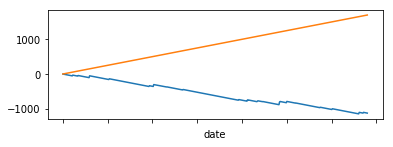

---
DEU	-329.30	+1322.00	+1322.00
---
pred_ridge_1.0_1: 	 -110.20 	 +441 	 -0.25
pred_ridge_0.1_1: 	 -107.20 	 +441 	 -0.24
pred_ridge_10.0_1: 	 -111.90 	 +440 	 -0.25


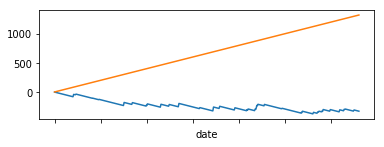

---
CHL	-300.50	+1034.00	+1034.00
---
pred_ridge_1.0_1: 	 -97.20 	 +344 	 -0.28
pred_ridge_0.1_1: 	 -86.30 	 +344 	 -0.25
pred_ridge_10.0_1: 	 -114.00 	 +343 	 -0.33


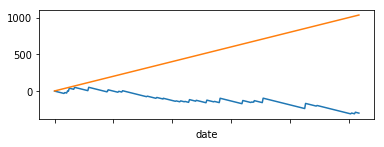

---
GBR	+280.70	+548.00	+548.00
---
pred_ridge_10.0_1: 	 +98.90 	 +187 	 +0.53
pred_ridge_0.1_1: 	 +90.40 	 +181 	 +0.50
pred_ridge_1.0_1: 	 +91.40 	 +180 	 +0.51


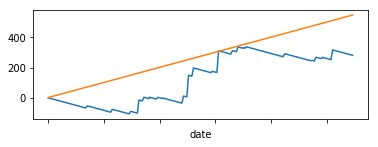

---
BEL	-74.10	+350.00	+350.00
---
pred_ridge_10.0_1: 	 -27.70 	 +116 	 -0.24
pred_ridge_0.1_1: 	 -22.20 	 +116 	 -0.19
pred_ridge_1.0_1: 	 -21.20 	 +115 	 -0.18


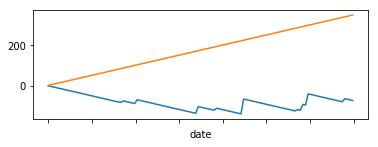

---
CHN	-82.60	+286.00	+286.00
---
pred_ridge_1.0_1: 	 -27.20 	 +95 	 -0.29
pred_ridge_0.1_1: 	 -27.20 	 +95 	 -0.29
pred_ridge_10.0_1: 	 -25.20 	 +93 	 -0.27


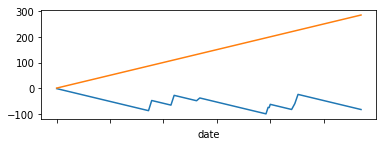

---
ZAF	+40.60	+261.00	+261.00
---
pred_ridge_1.0_1: 	 +22.70 	 +88 	 +0.26
pred_ridge_10.0_1: 	 +23.70 	 +87 	 +0.27
pred_ridge_0.1_1: 	 -5.80 	 +86 	 -0.07


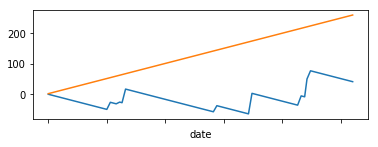

---
ARE	-145.20	+188.00	+188.00
---
pred_ridge_10.0_1: 	 -45.60 	 +64 	 -0.71
pred_ridge_1.0_1: 	 -49.80 	 +62 	 -0.80
pred_ridge_0.1_1: 	 -49.80 	 +62 	 -0.80


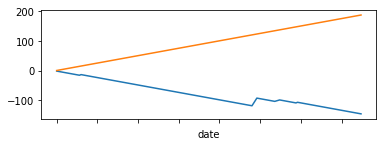

---
CHE	-117.60	+141.00	+141.00
---
pred_ridge_0.1_1: 	 -39.20 	 +47 	 -0.83
pred_ridge_1.0_1: 	 -39.20 	 +47 	 -0.83
pred_ridge_10.0_1: 	 -39.20 	 +47 	 -0.83


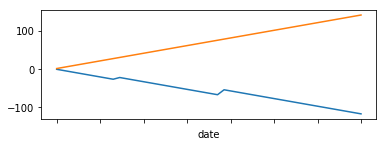

---
AUS	-42.80	+134.00	+134.00
---
pred_ridge_0.1_1: 	 -14.60 	 +45 	 -0.32
pred_ridge_1.0_1: 	 -14.60 	 +45 	 -0.32
pred_ridge_10.0_1: 	 -13.60 	 +44 	 -0.31


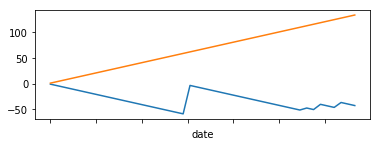

---
ESP	-71.40	+81.00	+81.00
---
pred_ridge_0.1_1: 	 -23.80 	 +27 	 -0.88
pred_ridge_1.0_1: 	 -23.80 	 +27 	 -0.88
pred_ridge_10.0_1: 	 -23.80 	 +27 	 -0.88


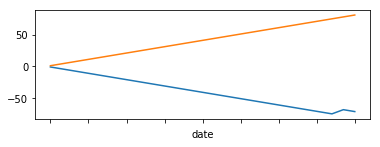

---
URY	+0.90	+42.00	+42.00
---
pred_ridge_0.1_1: 	 +0.30 	 +14 	 +0.02
pred_ridge_1.0_1: 	 +0.30 	 +14 	 +0.02
pred_ridge_10.0_1: 	 +0.30 	 +14 	 +0.02


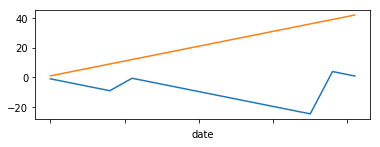

---
PER	-27.90	+36.00	+36.00
---
pred_ridge_0.1_1: 	 -9.30 	 +12 	 -0.78
pred_ridge_1.0_1: 	 -9.30 	 +12 	 -0.78
pred_ridge_10.0_1: 	 -9.30 	 +12 	 -0.78


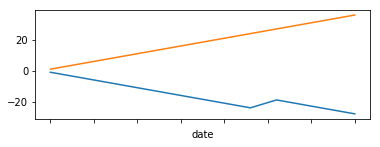

---
CZE	+54.30	+33.00	+33.00
---
pred_ridge_0.1_1: 	 +18.10 	 +11 	 +1.65
pred_ridge_1.0_1: 	 +18.10 	 +11 	 +1.65
pred_ridge_10.0_1: 	 +18.10 	 +11 	 +1.65


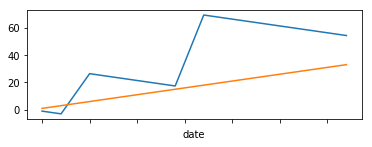

---
AAA	+49.80	+27.00	+27.00
---
pred_ridge_0.1_1: 	 +16.60 	 +9 	 +1.84
pred_ridge_1.0_1: 	 +16.60 	 +9 	 +1.84
pred_ridge_10.0_1: 	 +16.60 	 +9 	 +1.84


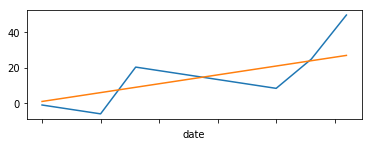

---
KOR	-10.00	+10.00	+10.00
---
pred_ridge_10.0_1: 	 -4.00 	 +4 	 -1.00
pred_ridge_0.1_1: 	 -3.00 	 +3 	 -1.00
pred_ridge_1.0_1: 	 -3.00 	 +3 	 -1.00


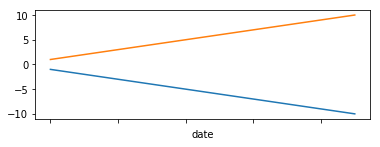

---
IRL	-3.00	+3.00	+3.00
---
pred_ridge_0.1_1: 	 -1.00 	 +1 	 -1.00
pred_ridge_1.0_1: 	 -1.00 	 +1 	 -1.00
pred_ridge_10.0_1: 	 -1.00 	 +1 	 -1.00


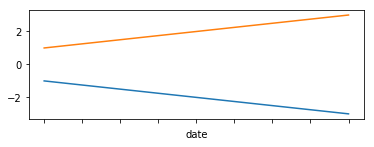

In [25]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#bb = bets.groupby('id').filter(lambda r: r['num'].nunique() == 7 ).copy()
bb = bets.copy()
bb = bets[(bets['target'].str.contains('^pred_ridge_'))  ].groupby('id').filter(lambda r: r['num'].nunique() >= 1 ).copy()
#bb = bets[(bets['target'].str.contains('^pred_rf_')) | (bets['target'].str.contains('^pred_rf_'))  ].groupby('id').filter(lambda r: r['num'].nunique() == 1 ).copy()
#bb = bets.groupby('id').filter(lambda r: (r['target'] == 'pred_mlp_1').sum() == 0 and (r['target'] == 'pred_knn_10_1').sum() == 1  )

def f(r):
    n1 = r[(r['target'] == 'pred_mlp_40_1')]['num']
    n2 = r[(r['target'] == 'pred_mlp_30_1')]['num']
    
    if not len(n1) and len(n2):
        return True
    if not len(n2) and len(n1):
        return True
    
    if n1.max() != n2.max():
        return True
    
    return False

def f2(r):
    return r[r['target'] == 'pred_rf_']['pred'].max() > 0 and r[r['target'] == 'pred_rf_']['pred_std'].max() > 0

#bb = bets.groupby('id').filter(f2)

f = 'country'

for s in bb[f].value_counts().index:
    x = bb[bb[f] == s].copy()
    print("---\n{}\t{:+.2f}\t{:+.2f}\t{:+.2f}\n---".format(s, x['profit'].sum(), x['bet'].sum(), len(x)))
    for t in x['target'].value_counts().index:
        bbb = x[(x['target'] == t) & (x['odds_ref']<20) & (x['pred']>0) & (x['declared_player_count'] > 1) ].copy()
        print("{:10s}: \t {:+.2f} \t {:+.0f} \t {:+.2f}".format(t, bbb.profit.sum(), bbb.profit.count(), bbb.profit.mean()) )
        
    x['stash'] = x['profit'].cumsum()
    x['cbet'] = x['bet'].cumsum()

    fig, axs = plt.subplots(1,1)
    x['stash'].plot(figsize=(6, 2))
    x['cbet'].plot(figsize=(6, 2))
    plt.show()

In [15]:
bets.columns


Index(['id', 'date', 'num', 'odds_ref', 'odds_final', 'target', 'pred',
       'pred_std', 'bet', 'profit', 'next_pred_1', 'next_pred_2',
       'next_pred_3', 'declared_player_count', 'handicap_distance',
       'handicap_distance_amax', 'handicap_distance_amin',
       'handicap_distance_mean', 'handicap_distance_r',
       'handicap_distance_std', 'handicap_weight', 'handicap_weight_amax',
       'handicap_weight_amin', 'handicap_weight_mean', 'handicap_weight_r',
       'handicap_weight_std', 'hist_1_pos', 'hist_2_pos', 'hist_3_pos',
       'hist_4_pos', 'hist_5_pos', 'hist_6_pos', 'odds_0', 'odds_1', 'odds_2',
       'odds_3', 'odds_4', 'odds_5', 'odds_6', 'odds_7', 'odds_8', 'odds_9',
       'placed_2_count', 'placed_2_count_amax', 'placed_2_count_amin',
       'placed_2_count_mean', 'placed_2_count_r', 'placed_2_count_std',
       'placed_3_count', 'placed_3_count_amax', 'placed_3_count_amin',
       'placed_3_count_mean', 'placed_3_count_r', 'placed_3_count_std',
       'placed

In [16]:
bets

,id,date,num,odds_ref,odds_final,target,pred,pred_std,bet,profit,next_pred_1,next_pred_2,next_pred_3,declared_player_count,handicap_distance,handicap_distance_amax,handicap_distance_amin,handicap_distance_mean,handicap_distance_r,handicap_distance_std,handicap_weight,handicap_weight_amax,handicap_weight_amin,handicap_weight_mean,handicap_weight_r,handicap_weight_std,hist_1_pos,hist_2_pos,hist_3_pos,hist_4_pos,hist_5_pos,hist_6_pos,odds_0,odds_1,odds_2,odds_3,odds_4,odds_5,odds_6,odds_7,odds_8,odds_9,placed_2_count,placed_2_count_amax,placed_2_count_amin,placed_2_count_mean,placed_2_count_r,placed_2_count_std,placed_3_count,placed_3_count_amax,placed_3_count_amin,placed_3_count_mean,placed_3_count_r,placed_3_count_std,placed_earnings,placed_earnings_amax,placed_earnings_amin,placed_earnings_mean,placed_earnings_r,placed_earnings_std,prev_year_earnings,prev_year_earnings_amax,prev_year_earnings_amin,prev_year_earnings_mean,prev_year_earnings_r,prev_year_earnings_std,prize,race_count,race_count_amax,race_count_amin,race_count_mean,race_count_r,race_count_std,victory_count,victory_count_amax,victory_count_amin,victory_count_mean,victory_count_r,victory_count_std,victory_earnings,victory_earnings_amax,victory_earnings_amin,victory_earnings_mean,victory_earnings_r,victory_earnings_std,category,sub_category,country,bets,stash
0,23330,2016-01-01,5,9.5,3.6,pred_rf_20_1,7.750000,1.528903e+00,1.0,-1.0,6.125000,5.540000,5.220000,11,0.0,0.0,0.0,0.0,100000.0,0.0,32.0,34.0,22.0,28.090909,1.048843,3.727051,0.0,0.0,6.0,6.0,1.0,0.0,3.8,4.3,6.9,9.5,11.8,11.8,11.8,14.6,14.6,19.0,0,4,0,1.727273,-1.215852,1.420627,0,5,0,2.181818,-1.312436,1.662419,0.000000,13.415780,0.000000,11.391129,-2.970533,3.834709,0.000000,13.418319,0.000000,10.168173,-2.004056,5.073798,4836,5,29,3,14.181818,-1.243017,7.386720,1,3,1,1.363636,-0.539360,0.674200,12.658106,14.160023,12.658106,13.356261,-1.510752,0.462124,PLAT,HANDICAP,ZAF,1.0,-1.0
1,23331,2016-01-01,8,11.2,48.5,pred_rf_200_1,6.530000,1.120240e+00,1.0,-1.0,6.319000,6.284000,6.036500,11,0.0,0.0,0.0,0.0,100000.0,0.0,29.0,33.0,21.0,27.363636,0.427458,3.828126,7.0,0.0,1.0,5.0,5.0,0.0,5.6,6.6,7.2,7.6,8.5,9.7,9.9,11.2,11.2,14.5,0,8,0,2.090909,-0.847216,2.467977,0,9,0,2.636364,-0.906693,2.907670,10.154285,14.148621,10.090009,12.279230,-1.636114,1.298776,0.000000,13.531348,0.000000,10.321112,-2.001144,5.157605,4836,6,71,6,23.727273,-0.813367,21.794912,1,4,1,1.727273,-0.804030,0.904534,12.760248,14.463190,12.732282,13.540397,-1.258736,0.619788,PLAT,HANDICAP,ZAF,2.0,-2.0
2,23331,2016-01-01,7,14.5,9.5,pred_svr_1,1.623116,4.885283e-01,1.0,-1.0,1.287431,1.281540,1.061137,11,0.0,0.0,0.0,0.0,100000.0,0.0,26.0,33.0,21.0,27.363636,-0.356215,3.828126,6.0,9.0,2.0,6.0,0.0,0.0,5.6,6.6,7.2,7.6,8.5,9.7,9.9,11.2,11.2,14.5,3,8,0,2.090909,0.368355,2.467977,0,9,0,2.636364,-0.906693,2.907670,12.513929,14.148621,10.090009,12.279230,0.180707,1.298776,12.896486,13.531348,0.000000,10.321112,0.499335,5.157605,4836,14,71,6,23.727273,-0.446309,21.794912,2,4,1,1.727273,0.301511,0.904534,13.683807,14.463190,12.732282,13.540397,0.231385,0.619788,PLAT,HANDICAP,ZAF,3.0,-3.0
3,23331,2016-01-01,9,5.6,13.5,pred_gbr_30_1,4.374575,4.398249e-01,1.0,-1.0,4.374575,4.308853,4.308853,11,0.0,0.0,0.0,0.0,100000.0,0.0,24.0,33.0,21.0,27.363636,-0.878664,3.828126,6.0,0.0,6.0,0.0,5.0,0.0,5.6,6.6,7.2,7.6,8.5,9.7,9.9,11.2,11.2,14.5,0,8,0,2.090909,-0.847216,2.467977,1,9,0,2.636364,-0.562775,2.907670,11.585255,14.148621,10.090009,12.279230,-0.534330,1.298776,12.892595,13.531348,0.000000,10.321112,0.498581,5.157605,4836,14,71,6,23.727273,-0.446309,21.794912,1,4,1,1.727273,-0.804030,0.904534,13.017005,14.463190,12.732282,13.540397,-0.844470,0.619788,PLAT,HANDICAP,ZAF,4.0,-4.0
4,23331,2016-01-01,7,14.5,9.5,pred_gbr_20_1,4.130388,3.813431e-01,1.0,-1.0,4.130388,4.059822,4.059822,11,0.0,0.0,0.0,0.0,100000.0,0.0,26.0,33.0,21.0,27.363636,-0.356215,3.828126,6.0,9.0,2.0,6.0,0.0,0.0,5.6,6.6,7.2,7.6,8.5,9.7,9.9,11.2,11.2,14.5,3,8,0,2.090909,0.368355,2.467977,0,9,0,2.636364,-0.906693,